In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [36]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Problem Statement 1: Data Cleaning and Exploration


#### Objective: To identify and rectify inconsistencies, outliers, and missing data in a large, real-world dataset.

#### Load and inspect

In [37]:
#Top 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [39]:
#Statistical summary
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Missing values

In [40]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [41]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['reviews_per_month'].isnull().sum()

0

In [42]:
#Dropping column last_reviews
df.drop('last_review', axis=1, inplace=True)

In [43]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

#### Outlier Detection and Handling

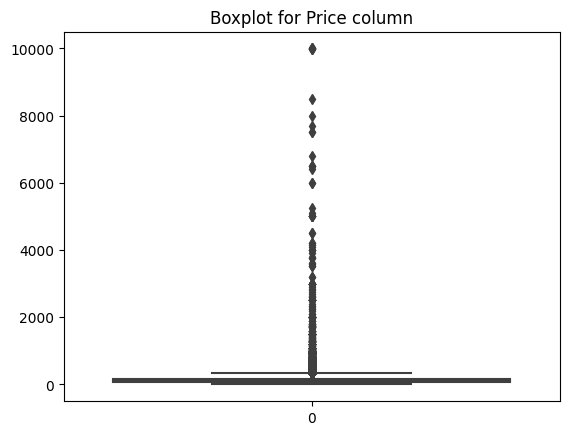

In [44]:
#Boxplot for outlier detection
sns.boxplot(df['price'])
plt.title('Boxplot for Price column')
plt.show()

In [45]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3-Q1
print('Q1 is',Q1)
print('Q3 is',Q3)
print('IQR is',IQR)

Q1 is 69.0
Q3 is 175.0
IQR is 106.0


In [46]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -90.0
Upper Bound: 334.0


In [47]:
#removing outliers
df_cleaned = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

Original DataFrame shape: (48895, 15)
Cleaned DataFrame shape: (45923, 15)


#### Data Inconsistency

In [48]:
#Removing trailing spaces and incosistent capitalization
df_cleaned.loc[:, 'name'] = df_cleaned['name'].str.strip().str.lower()
df_cleaned.loc[:, 'host_name'] = df_cleaned['host_name'].str.strip().str.lower()

In [49]:
#Replacing null values with 'Unknown'
df_cleaned.loc[:, 'name'] = df_cleaned['name'].fillna('Unknown')
df_cleaned.loc[:, 'host_name']= df_cleaned['host_name'].fillna('Unknown')

## Problem Statement 2: Central Tendency and Visualization

#### Objective: To calculate and visualize measures of central tendency for key variables in the dataset.

#### Calculate Central Tendency

In [50]:
mean_price = df_cleaned['price'].mean()
median_price = df_cleaned['price'].median()
mode_price = df_cleaned['price'].mode()[0]

print(f"Mean Price is {mean_price:.2f} \nPrice Median is {median_price:.2f} \nPrice Mode is {mode_price}")

Mean Price is 119.97 
Price Median is 100.00 
Price Mode is 100


In [78]:
mean_reviews = df_cleaned['number_of_reviews'].mean()
median_reviews = df_cleaned['number_of_reviews'].median()
mode_reviews = df_cleaned['number_of_reviews'].mode()[0]

print(f"Mean of number of reviews is {mean_reviews:.2f} \nMedian of number of reviews is {median_reviews:.2f} \nMode of number of reviews is {mode_reviews}")

Mean of number of reviews is 23.94 
Median of number of reviews is 5.00 
Mode of number of reviews is 0


#### Analyse and Interpret

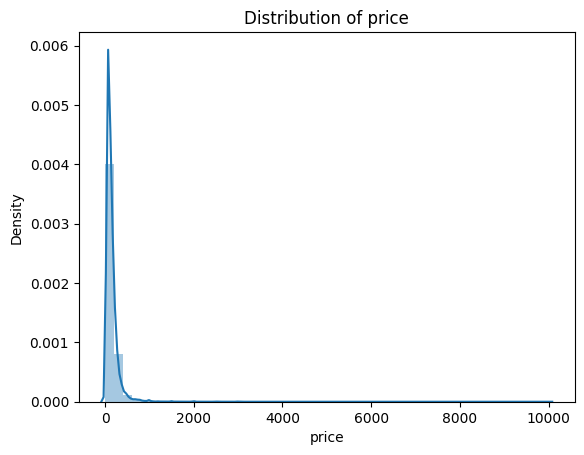

In [52]:
sns.distplot(df['price'])
plt.title('Distribution of price')
plt.show()

In [53]:
price_skewness = df_cleaned['price'].skew()
print(f'Skewness of price column is {price_skewness:.2f}')
# >0 implies positive skewness ie long tail on the right

Skewness of price column is 0.92


##### Since price data is positively skewed, the mean gets pulled up by those extreme values, while the median is more robust.

In [79]:
print(f"The average price is {mean_price:.2f}, while the median price is {median_price:.2f}.")
print("Because price column is positively skewed with extreme values, the median is a better representation of price.")

The average price is 119.97, while the median price is 100.00.
Because price column is positively skewed with extreme values, the median is a better representation of price.


#### Visualisation

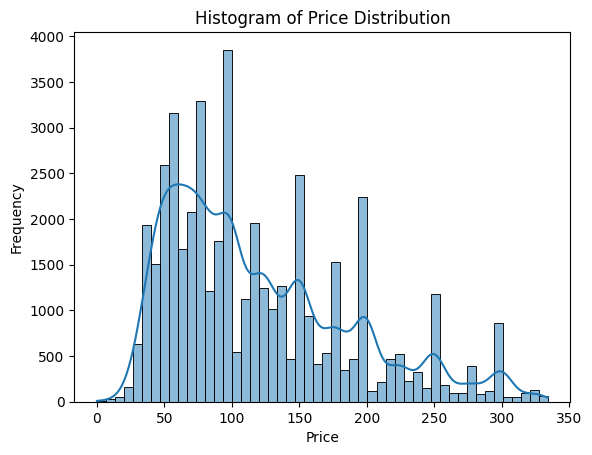

In [55]:
#Histogram
sns.histplot(df_cleaned['price'], bins=50, kde=True)
plt.title("Histogram of Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

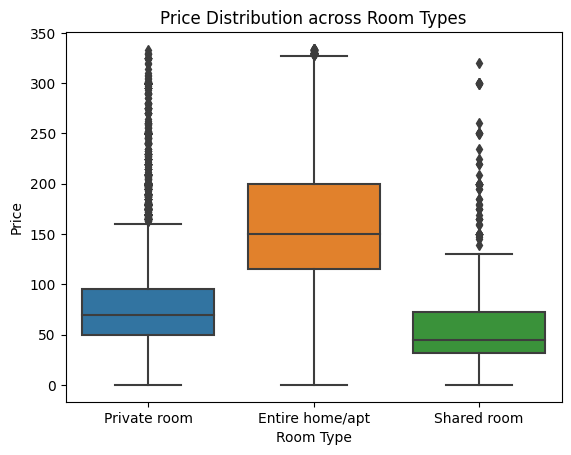

In [56]:
#Boxplots
sns.boxplot(x='room_type', y='price', data=df_cleaned)
plt.title("Price Distribution across Room Types")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

#### Yes, typical price seem to differ significantly between different room types. Apartment type has high median and maximum values having less outliers whereas Private rooms and Shared rooms have a large number of outliers having low median.

## Problem Statement 3: Sampling and the Central Limit Theorem (CLT)

#### Objective: To demonstrate the Central Limit Theorem by drawing samples from a non-normally distributed population.

#### Population Distribution

In [57]:
#population
population = df_cleaned['calculated_host_listings_count']


In [58]:
population_mean = population.mean()
print(f"Population mean is {population_mean:.2f}")

Population mean is 6.64


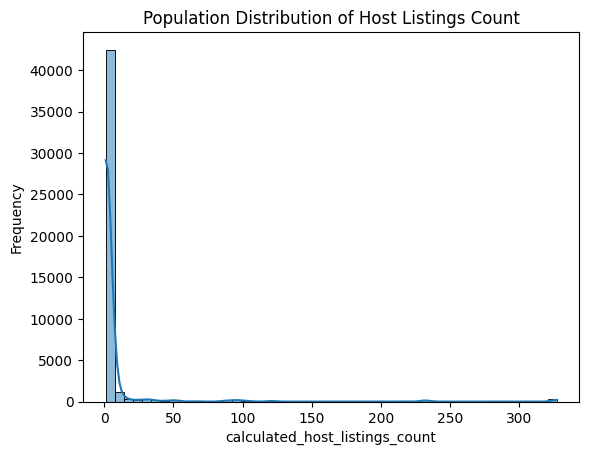

In [59]:
#histogram of population data
sns.histplot(population,bins=50, kde=True)
plt.title("Population Distribution of Host Listings Count")
plt.xlabel("calculated_host_listings_count")
plt.ylabel("Frequency")
plt.show()

The population data is heavily right skewed.

In [80]:
population_mean = np.mean(population)
print(f"Population Mean:{population_mean:.4f}")

Population Mean:6.6397


#### Create a Sampling Distribution

In [60]:
sample_means=[]
for i in range(1000):
    sample = np.random.choice(population, size=50, replace=True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
    


#### Visualize and Verify CLT

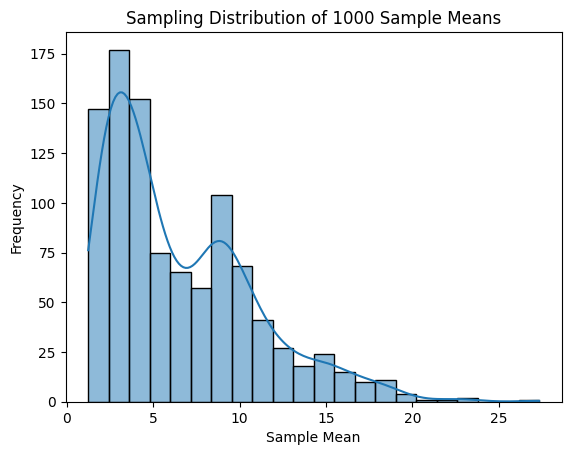

In [61]:
#histogram of 1000 samples
sns.histplot(sample_means, kde=True, edgecolor='k')
plt.title("Sampling Distribution of 1000 Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

In [62]:
population_skewness = pd.Series(population).skew()
print(f'Skewness of population is {population_skewness:.2f}')

Skewness of population is 8.40


In [63]:
sample_skewness = pd.Series(sample_means).skew()
print(f'Skewness of sample is {sample_skewness:.2f}')

Skewness of sample is 1.08


In [64]:

population_mean = np.mean(population)
sampling_mean = np.mean(sample_means)

print(f"Population Mean:{population_mean:.4f}")
print(f"Mean of Sampling Distribution:{sampling_mean:.4f}")

Population Mean:6.6397
Mean of Sampling Distribution:6.5338


Population mean and sample mean are approximately same.

The population distribution of calculated_host_listings_count is highly right-skewed. With a sample size of n=50, the sampling distribution of means also shows right skew (skewness ≈ 1.57), but it is less skewed than the population. This illustrates that the Central Limit Theorem is working, but since the population is extremely skewed, larger sample sizes (n=100, 200, etc.) are needed before the sampling distribution becomes approximately normal. With increasing n, the distribution of sample means becomes more bell-shaped and its mean converges to the population mean, consistent with the CLT.

## Problem Statement 4: Hypothesis Testing

#### Objective: To use a t-test to determine if there is a statistically significant difference between two groups.

#### State the hypothesis

Null Hypothesis (H₀):
The average price of Airbnb listings in Manhattan = The average price in Brooklyn.

Alternative Hypothesis (Hₐ):
The average price of Airbnb listings in Manhattan ≠ The average price in Brooklyn.

In [65]:
#Prepare the data
manhattan_prices = df[df['neighbourhood_group'] == 'Manhattan']['price']
brooklyn_prices = df[df['neighbourhood_group'] == 'Brooklyn']['price']

print("Manhattan Mean Price:", manhattan_prices.mean())
print("Brooklyn Mean Price:", brooklyn_prices.mean())

Manhattan Mean Price: 196.8758136743456
Brooklyn Mean Price: 124.38320732192598


#### Perform the t-test

In [67]:
#t-test
from scipy import stats
t_stat, p_value = stats.ttest_ind(manhattan_prices, brooklyn_prices, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 30.479715951312564
P-value: 1.4649940716907438e-201


In [68]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference in the average price between Manhattan and Brooklyn listings.")
else:
    print("Fail to reject the null hypothesis.")
    print("Conclusion: There is NO statistically significant difference in the average price between Manhattan and Brooklyn listings.")

Reject the null hypothesis.
Conclusion: There is a statistically significant difference in the average price between Manhattan and Brooklyn listings.


## Problem Statement 5: Advanced Pandas Operations


#### Objective: To practice advanced data manipulation, grouping, and performance optimization techniques in Pandas.

#### Data Selection and Performance

In [70]:
#Boolena indexing
selection = df[(df['neighbourhood_group'] == 'Bronx') &
                     (df['price'] < 100) &
                     (df['number_of_reviews'] > 10)]

print("Boolean Indexing Selection:")
selection.head()

Boolean Indexing Selection:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276


In [71]:
# Query method
bronx_selection_query = df.query("neighbourhood_group == 'Bronx' and price < 100 and number_of_reviews > 10")

print("Query Method Selection:")
bronx_selection_query.head()

Query Method Selection:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
171,44096,Room with a View,190409,Waundell,Bronx,Highbridge,40.83232,-73.93184,Private room,40,1,219,2.04,3,353
207,54626,Cozy bedroom by Yankee Stadium,190409,Waundell,Bronx,Highbridge,40.83075,-73.93058,Private room,45,1,138,1.45,3,323
433,149777,Artsy 1 bedroom Apt. 20 min to 42nd Grand Cent...,716306,"Dee, Dre & Mama Shelley",Bronx,Woodlawn,40.89747,-73.86390,Entire home/apt,77,1,197,2.49,1,309
484,169306,Affordable & Cozy,806214,Vanessa,Bronx,University Heights,40.85811,-73.90675,Private room,37,4,117,1.21,1,232
557,206071,Yankee Stadium Oasis 2 stops to Manhattan!,12221,Lori,Bronx,Concourse Village,40.82802,-73.92039,Private room,50,3,258,2.70,2,276


#### Hierarchical Indexing and Aggregation

In [73]:
grouped = df.groupby(['neighbourhood_group', 'room_type']).agg(
    avg_price=('price', 'mean'),
    total_reviews=('number_of_reviews', 'sum')
)
grouped

avg_price  total_reviews
neighbourhood_group room_type                                 
Bronx               Entire home/apt  127.506596          11627
                    Private room      66.788344          16312
                    Shared room       59.800000            432
Brooklyn            Entire home/apt  178.327545         267128
                    Private room      76.500099         213653
                    Shared room       50.527845           5793
Manhattan           Entire home/apt  249.239109         235147
                    Private room     116.776622         209150
                    Shared room       88.977083          10272
Queens              Entire home/apt  147.050573          60644
                    Private room      71.762456          93561
                    Shared room       69.020202           2745
Staten Island       Entire home/apt  173.846591           5857
                    Private room      62.292553           5670
                    Shared room       57.444444             14

In [74]:
most_expensive = grouped['avg_price'].idxmax()
print("\nMost expensive on average:", most_expensive)


Most expensive on average: ('Manhattan', 'Entire home/apt')


#### Vectorized Operations (Applying a Function)

In [75]:
def categorize_availability(days):
    if days == 0:
        return 'Low'
    elif 1 <= days <= 180:
        return 'Medium'
    else:
        return 'High'


df['availability_category'] = df['availability_365'].apply(categorize_availability)

#### High-Performance Calculation with eval()

In [77]:
df.eval("review_score = (reviews_per_month * number_of_reviews) / (minimum_nights + 1)", inplace=True)
df[['reviews_per_month', 'number_of_reviews', 'minimum_nights', 'review_score']].head()

,reviews_per_month,number_of_reviews,minimum_nights,review_score
0,0.21,9,1,0.945000
1,0.38,45,1,8.550000
2,0.00,0,3,0.000000
3,4.64,270,1,626.400000
4,0.10,9,10,0.081818
